# export fgrid and fault id files from Petrel and make sure these two files are exported using the same setting (i.e., same cell setting)

# extract information for each cell from a fgrid file

In [1]:
from extract_fgrid_file import extract_fgrid_file
df = extract_fgrid_file('data/JD_Sula_2025_flow.fgrid')
df

Total cells processed: 989001


,i,j,k,cell_id,x_ave,y_ave,z_ave
0,1,1,1,1,425203.1875,7129964.500,1673.812187
1,2,1,1,2,425696.7600,7129964.500,1673.635188
2,3,1,1,3,426190.3300,7129964.625,1673.305275
3,4,1,1,4,426683.9000,7129964.750,1672.819962
4,5,1,1,5,427177.4700,7129964.875,1672.187537
...,...,...,...,...,...,...,...
988996,103,117,79,988997,475383.5950,7072246.375,1214.582087
988997,104,117,79,988998,475877.2175,7072246.500,1213.734400
988998,105,117,79,988999,476370.8500,7072246.625,1213.076587
988999,106,117,79,989000,476864.4750,7072246.875,1212.613000


# decompress fault id file and attach it to the cell info dataframe

In [2]:
from CMG_format_decompress import CMG_format_decompress
fault_id = CMG_format_decompress('data/JD_Sula_2025_flow_fault_id.GRDECL')
print(fault_id.shape)
df['fault_id'] = fault_id
df['fault_id'] = df['fault_id'].astype(int)
df

(989001,)


,i,j,k,cell_id,x_ave,y_ave,z_ave,fault_id
0,1,1,1,1,425203.1875,7129964.500,1673.812187,-999
1,2,1,1,2,425696.7600,7129964.500,1673.635188,-999
2,3,1,1,3,426190.3300,7129964.625,1673.305275,-999
3,4,1,1,4,426683.9000,7129964.750,1672.819962,-999
4,5,1,1,5,427177.4700,7129964.875,1672.187537,-999
...,...,...,...,...,...,...,...,...
988996,103,117,79,988997,475383.5950,7072246.375,1214.582087,-999
988997,104,117,79,988998,475877.2175,7072246.500,1213.734400,-999
988998,105,117,79,988999,476370.8500,7072246.625,1213.076587,-999
988999,106,117,79,989000,476864.4750,7072246.875,1212.613000,-999


# extract pressure from the npy file and attach it to the cell info dataframe

In [3]:
from extract_npy_properties import extract_npy_properties

df_fault = extract_npy_properties(
    fault_table = df,
    npy_property_file_path = 'data/rst_npy/case1_pres.npy',
    save_path = 'results/case1_fault_table.csv',
    sim_year = [2030, 2040, 2050, 2060, 2550, 3050],
    n_i = 117,
    n_j = 107,
    k_layer_start = 41,
    k_layer_end = 79
    )

df_fault

,i,j,k,cell_id,x_ave,y_ave,z_ave,fault_id,2030,2040,2050,2060,2550,3050
0,1,1,1,1,425203.1875,7129964.500,1673.812187,-999,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2,425696.7600,7129964.500,1673.635188,-999,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,3,426190.3300,7129964.625,1673.305275,-999,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,4,426683.9000,7129964.750,1672.819962,-999,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,5,427177.4700,7129964.875,1672.187537,-999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988996,103,117,79,988997,475383.5950,7072246.375,1214.582087,-999,NaN,NaN,NaN,NaN,NaN,NaN
988997,104,117,79,988998,475877.2175,7072246.500,1213.734400,-999,NaN,NaN,NaN,NaN,NaN,NaN
988998,105,117,79,988999,476370.8500,7072246.625,1213.076587,-999,NaN,NaN,NaN,NaN,NaN,NaN
988999,106,117,79,989000,476864.4750,7072246.875,1212.613000,-999,NaN,NaN,NaN,NaN,NaN,NaN


# check

In [4]:
import pandas as pd
import numpy as np
case1_pres = np.load('data/rst_npy/case1_pres.npy')
fault_table = pd.read_csv('results/case1_fault_table.csv')
i = 20
j = 30
k = 50
k_layer_start = 41
print(case1_pres[i-1,j-1,k - k_layer_start,1])
print(fault_table.loc[(fault_table['i'] == i) & (fault_table['j'] == j) & (fault_table['k'] == k), '2040'])

16495.303253099482
616553    16495.303253
Name: 2040, dtype: float64


In [ ]:
from plot_fault_properties import plot_fault_distribution_2d_matplotlib

# Default figure size (10, 8)
fig1 = plot_fault_distribution_2d_matplotlib(
    fault_table_path='data/case1_pres_fault_table.csv',
    k_layer=41,
    year_column='2030'
)
plt.show()

# Custom figure size - wider plot
fig2 = plot_fault_distribution_2d_matplotlib(
    fault_table_path='data/case1_pres_fault_table.csv',
    k_layer=41,
    year_column='2030',
    figsize=(15, 8)  # Wider plot
)
plt.show()

# Custom figure size - square plot
fig3 = plot_fault_distribution_2d_matplotlib(
    fault_table_path='data/case1_pres_fault_table.csv',
    k_layer=41,
    year_column='2030',
    figsize=(12, 12)  # Square plot
)
plt.show()

/var/folders/y_/rpb73pzx3xv78kdkpn5_ml3w0000gn/T/ipykernel_69144/690827662.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
/var/folders/y_/rpb73pzx3xv78kdkpn5_ml3w0000gn/T/ipykernel_69144/690827662.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


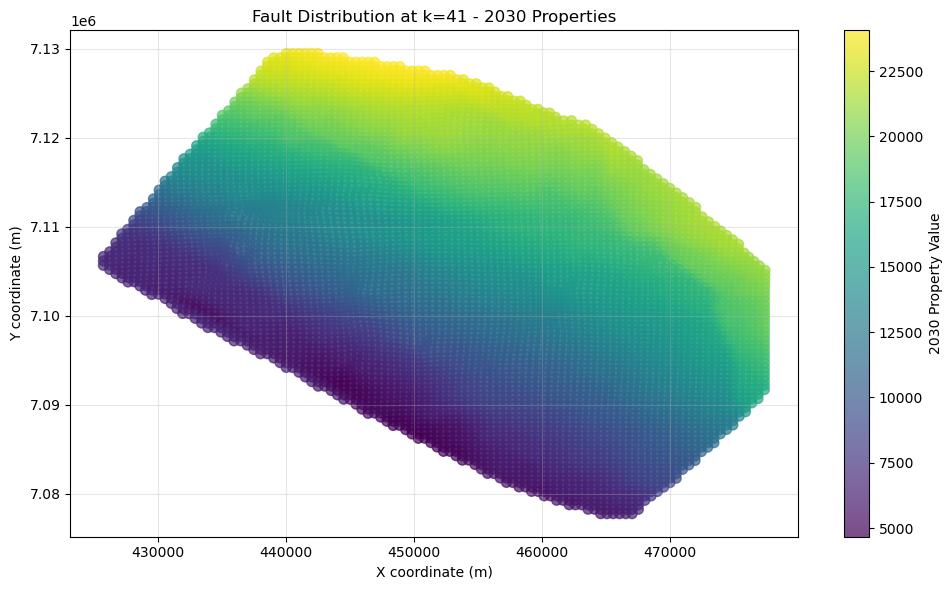

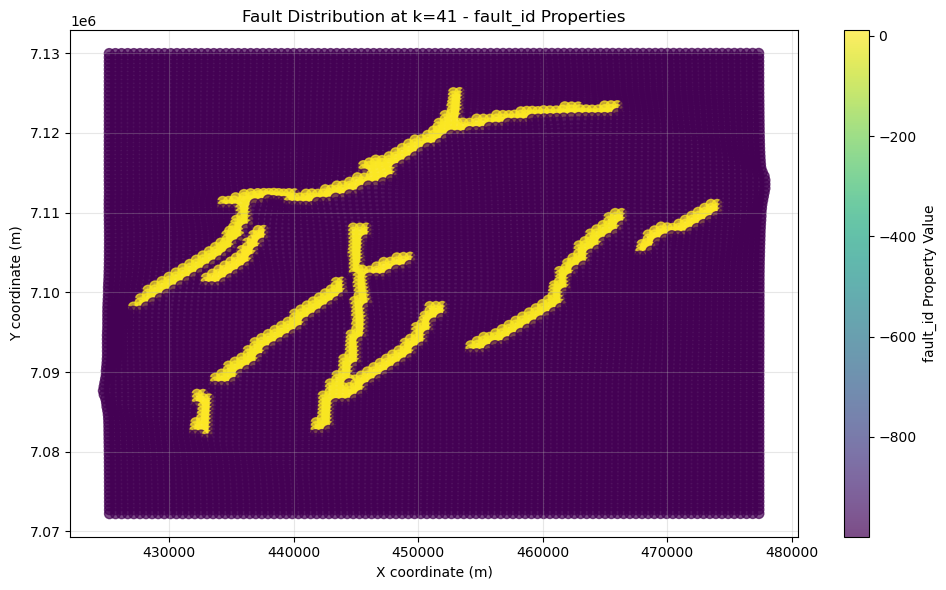

In [5]:
from plot_fault_properties import plot_fault_distribution_2d_matplotlib

# Matplotlib version (non-interactive)
fig2 = plot_fault_distribution_2d_matplotlib(
    fault_table_path='results/case1_fault_table.csv',
    k_layer=41,
    year_column='2030',
    figsize=(10, 6)  # Wider plot
)
fig2.show()

# Matplotlib version (non-interactive)
fig3 = plot_fault_distribution_2d_matplotlib(
    fault_table_path='results/case1_fault_table.csv',
    k_layer=41,
    year_column='fault_id',
    figsize=(10, 6)  # Wider plot
)
fig3.show()


In [3]:
from plot_fault_properties import plot_fault_properties_interactive
import matplotlib.pyplot as plt

# For a single year visualization
fig = plot_fault_properties_interactive(
    fault_table_path = 'data/case1_pres_fault_table.csv',
    fault_id = 0,
    year_column = '2030'
)
fig.show()

# # For timeseries analysis
# fig = plot_fault_timeseries(
#     fault_table_path='results/JD_Sula_2025_flow_fault.csv',
#     fault_id=1,  # Replace with your actual fault_id
#     year_columns=['2030', '2040', '2050', '2060', '2550', '3050']
# )
# plt.show()

In [5]:
import numpy as np

arr= np.arange(1,25)
mean4 = arr[0::4].mean()
arr[0::3]

array([ 1,  4,  7, 10, 13, 16, 19, 22])